# Scattering and diffraction of SH waves by a finite crack: an analytical solution

Francisco J. Sanchez-Sesma and Ursula Iturraran-Viveros

In [21]:
import numpy as np
import math 
import cmath
from numpy.lib.scimath import sqrt
from scipy import fft, ifft

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

An analytical expression for the diffracted field can finally be
obtained and this is given by 

\begin{equation}\label{the-solution}
v^{(d)^{-}} = v^{(d)^-}_0 + \frac{v_1Z
-v_2}{1-Z^2}s(r_1)F(\sqrt{2kr_1})+\frac{v_2Z-v_1}{1-Z^2}s(r_2)
F(\sqrt{2kr_2}),
\end{equation}
This is the eq. (20) of the manuscript and correspond to the following pice of code:

In [22]:
def SOMMER(X,AKA,AGAM):
    DERP=2.0/math.sqrt(math.pi)
    AKX1=AKA*(1.0+X)
    AKX2=AKA*(1.0-X)
    AKASG=AKA*math.sin(AGAM)
    AKXSG=AKASG*X
    AR1=sqrt(2.0*AKX1)*math.sin(4.0*math.pi-AGAM/2.0)
    AR11=sqrt(2.0*AKX1)
    AR2=sqrt(2.0*AKX2)*math.sin(4.0*math.pi+AGAM/2.0)
    AR21=sqrt(2.0*AKX2)
    AR3=sqrt(4.0*AKA)*math.sin(4.0*math.pi-AGAM/2.0)
    AR4=sqrt(4.0*AKA)*math.sin(4.0*math.pi+AGAM/2.0)
    AR5=sqrt(4.0*AKA)
    FAC=-cmath.exp(1j*AKXSG)
    FAC=FAC+cmath.exp(-1j*AKASG+1j*AKX1-1j*4.0*math.pi)*FF(AR1)*DERP
    FAC=FAC+cmath.exp(+1j*AKASG+1j*AKX2-1j*4.0*math.pi)*FF(AR2)*DERP
    Z=cmath.exp(1j*2.0*AKA-1j*4.0*math.pi)*FF(AR5)*DERP
    Z1=Z*cmath.exp(+1j*AKX1-1j*4.0*math.pi)*FF(AR11)*DERP
    Z1=Z1-cmath.exp(+1j*AKX2-1j*4.0*math.pi)*FF(AR21)*DERP
    Z1=Z1/(1.0-Z*Z)
    Z2=Z*cmath.exp(+1j*AKX2-1j*4.0*math.pi)*FF(AR21)*DERP
    Z2=Z2-cmath.exp(+1j*AKX1-1j*4.0*math.pi)*FF(AR11)*DERP
    Z2=Z2/(1.0-Z*Z)
    FAC=FAC+cmath.exp(-1j*AKASG+1j*2.0*AKA-1j*4.0*math.pi)*FF(AR3)*DERP*Z1
    FAC=FAC+cmath.exp(+1j*AKASG+1j*2.0*AKA-1j*4.0*math.pi)*FF(AR4)*DERP*Z2
    FAC=FAC.conjugate()
    SOMM=-FAC
    return(SOMM)

We use the rational approximation for functions $f(x)$ and $g(x)$ given in Abramowitz \& Stegun (1970) p. 302.
Function $f(x)$ is given by
\begin{equation}
f(x)=\frac{1+.926x}{2+x(1.792+3.104x)}
\end{equation}

In [23]:
def FM(X):
    A=1.0+0.926*X
    B=(3.104*X+1.792)*X+2.0
    FM=A/B
    return(FM)

Function $g(x)$ is given by
\begin{equation}
g(x)=\frac{1}{2+x(4.142+3.492x+6.670x^2)}
\end{equation}

In [24]:
def GM(X):
    A=((6.67*X+3.492)*X+4.142)*X+2.0
    GM=1.0/A
    return(GM)

In [25]:
def FF(Z):
    AUX=sqrt(math.pi/2.0)
    if Z >=0.0:
        FF=AUX*(GM(Z/AUX)+1j*FM(Z/AUX))
    else:
        BAL=sqrt(math.pi)*cmath.exp(-1j*(Z*Z-math.pi/4.0))
        FF=BAL-AUX*(GM(-Z/AUX)+1j*FM(-Z/AUX))
    return(FF)

In [26]:
def DESF(X,Z,AL,AK):
    B1=1.0+0.0*1j
    B2=0.0+0.0*1j
    AUX1=B1*cmath.exp(1j*(AK*Z-AL*X))
    AUX2=B2*cmath.exp(-1j*(AK*Z+AL*X))
    UY=AUX1+AUX2
    PS2=AUX1-AUX2
    SXY=-1j*AL*UY
    SZY=+1j*AK*PS2
    return(UY,SXY,SZY)

In [27]:
def ONDAS(GS,AKB):
    ZER=0.0+0.0*1j
    B1=1.0+0.0*1j
    B2=0.0+0.0*1j
    AL=AKB*math.sin(GS)+ZER
    AK=AKB*math.cos(GS)+ZER
    return(AL,AK)

In [28]:
def Ricker(j,dt,tp,ts):
        b=np.pi*(dt*(j-1.0)-ts)/tp
        b2=b**2
        return((b2-0.5)*np.exp(-b2))

The time duration is equal to the number of frequecies divided by a paramter $\eta_{max}$: $$T=\frac{N}{\eta_{max}}$$

In [29]:
#INPUT DATA
NINC=5  #Number of angles of incidence
GAM=np.array([0.0,30.0,60.0,-30.0,-60.0]) #Incidence angle in degrees
XI,DX,NES=-2, 0.08, 51 #Initial position for the receeivers, Delta receviers, Number of receivers
TT=20.48 #Time duration 
N=512 # Number of time samples

In [30]:
#Incidence angles in radians
GAM=0.017453293*GAM

In [31]:
N2=int(N/2)
#Array with the transfer function
FDTUY1=np.zeros((NES,NINC,N2+1))+1j*np.zeros((NES,NINC,N2+1))
FDTUY2=np.zeros((NES,NINC,N2+1))+1j*np.zeros((NES,NINC,N2+1))

In [32]:
#Zero frequency
for IES in range(0,NES):
    for IC in range(0, NINC, 1):
        TOTO=0.01
        AL,AK=ONDAS(GAM[IC],TOTO)
        TOTO=0.0
        UY,SXY,SZY=DESF(TOTO,TOTO,AL,AK)
        FDTUY1[IES,IC,0]=UY
        FDTUY2[IES,IC,0]=UY
#Complex arrays of results
SUMY1=np.zeros((NINC))+1j*np.zeros((NINC))
SUMY2=np.zeros((NINC))+1j*np.zeros((NINC))

In [33]:
Z=0.0
COD=np.zeros((NINC,N2+1))+1j*np.zeros((NINC,N2+1))
for J in range(1,N2+1):
    FJ=J/TT
    AKA=2.0*math.pi*FJ
    for IES in range(0,NES):
        X=XI+DX*(IES)
        for IC in range(0,NINC):
            if abs(X)<=1:
                SUMY1[IC]=SOMMER(X,AKA,GAM[IC])
                SUMY2[IC]=-SUMY1[IC]
            else:
                SUMY1[IC]=0.0+0.0*1j
                SUMY2[IC]=0.0+0.0*1j
    
        for IC in range(0,NINC):
            AL,AK=ONDAS(GAM[IC],AKA)
            UY,SXY,SZY=DESF(X,Z,AL,AK)
            FDTUY1[IES,IC,J]=UY+SUMY1[IC]
            FDTUY2[IES,IC,J]=UY+SUMY2[IC]
            #COD[IC,J]=FDTUY1[IES,IC,J]-FDTUY2[IES,IC,J] #Crack Opening Displacement

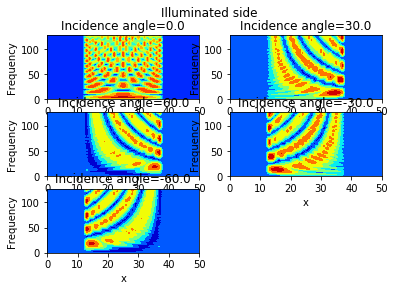

In [44]:
#Plots in the frequency domain for the various incidences
plt.figure(1)
plt.set_cmap('jet')
plt.suptitle('Illuminated side')
plt.subplot(321)
plt.contourf(abs(FDTUY1[:,0,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=0.0')

plt.subplot(322)
plt.contourf(abs(FDTUY1[:,1,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=30.0')

plt.subplot(323)
plt.contourf(abs(FDTUY1[:,2,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=60.0')

plt.subplot(324)
plt.contourf(abs(FDTUY1[:,3,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=-30.0')

plt.subplot(325)
plt.contourf(abs(FDTUY1[:,4,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=-60.0')

plt.show()


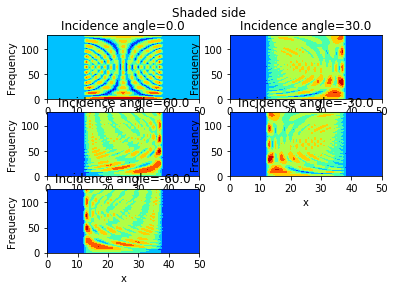

In [45]:
plt.figure(2)
plt.set_cmap('jet')
plt.suptitle('Shaded side')
plt.subplot(321)
plt.contourf(abs(FDTUY2[:,0,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=0.0')

plt.subplot(322)
plt.contourf(abs(FDTUY2[:,1,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=30.0')

plt.subplot(323)
plt.contourf(abs(FDTUY2[:,2,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=60.0')

plt.subplot(324)
plt.contourf(abs(FDTUY2[:,3,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=-30.0')

plt.subplot(325)
plt.contourf(abs(FDTUY2[:,4,0:int(N2/2)].T))
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Incidence angle=-60.0')

plt.show()

The time duration $T$ is equal to the number of frequecies divided by a paramter $\eta_{max}$: $$T=\frac{N}{\eta_{max}},$$ this implies that $T=(2*N)*\Delta t$ 

In [54]:
#Compute the solution in the time domain
#EtaMax = ome*a/(pi*beta), a=semi-length of the crack, beta=velocity
etamax=12.5 
tp=0.048
ts=0.1
dt=0.04

In [52]:
t=np.arange(0.0,(N*dt)+dt,dt)

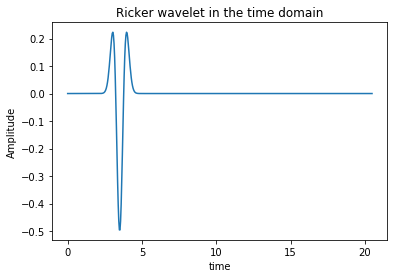

In [55]:
plt.plot(t,Ricker(t,dt,tp,ts))
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Ricker wavelet in the time domain')
plt.show()

In [56]:
RT=Ricker(t,dt,tp,ts)

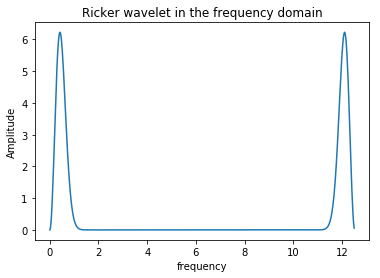

In [57]:
df=etamax/N
freq=np.arange(0.0,etamax+df,df)
RF=fft(RT) #Ricker in the frequency domain
plt.plot(freq,abs(RF))
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.title('Ricker wavelet in the frequency domain')
plt.show()

In [58]:
#Complex Ricker in the frequency domain
CRick=RF+1j*np.zeros(N+1)

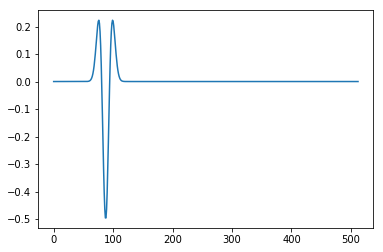

In [59]:
#Check that the inverse of the FFT returns the original Ricker in the time domain
plt.plot(ifft(CRick).real)

In [27]:
N

512

In [60]:
#Zero frequency
prodRickILL=np.zeros((NES,NINC,N),dtype=complex) #Illuminated side
prodRickSHA=np.zeros((NES,NINC,N),dtype=complex) #Shaded side
#RF[N2]*FDTUY1[0:,0:,N2]
for IC in np.arange(0,NINC):
    for j in np.arange(0,NES):
        for k in np.arange(0,N2-1):
            prodRickILL[j,IC,k]=CRick[k]*FDTUY1[j,IC,k]     #Convolution with the Ricker
            prodRickILL[j,IC,N-k-1]=np.conj(prodRickILL[j,IC,k+1]);     # The Crepe..!
            prodRickSHA[j,IC,k]=CRick[k]*FDTUY2[j,IC,k]     #Convolution with the Ricker
            prodRickSHA[j,IC,N-k-1]=np.conj(prodRickSHA[j,IC,k+1]);     # The Crepe..!
    

In [61]:
prodRickILL[0:,0:,0]=0+1j*0
prodRickSHA[0:,0:,0]=0+1j*0

Back to the time domain

In [62]:
crackTimeILL=(ifft(prodRickILL))
crackTimeSHA=(ifft(prodRickSHA))

Plot the results

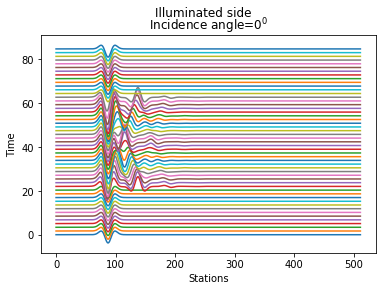

In [63]:
dd2 = np.max(crackTimeILL) 
plt.figure(3)
plt.suptitle('Illuminated side')
#plt.subplot(321)
for i in range(NES):
    plt.plot(15*(crackTimeILL[i,0,:]).real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=$0^\mathrm{0}$')
plt.show()

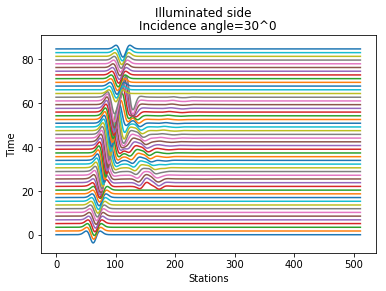

In [64]:
plt.suptitle('Illuminated side')
#plt.subplot(322)
for i in range(NES):
    plt.plot(15*crackTimeILL[i,1,:].real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=30^0')

plt.show()

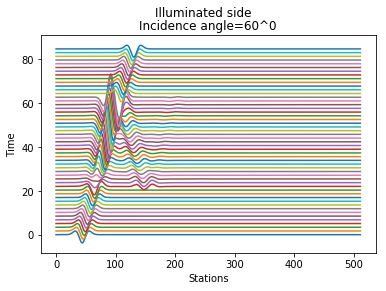

In [65]:
plt.suptitle('Illuminated side')
#plt.subplot(323)
for i in range(NES):
    plt.plot(15*crackTimeILL[i,2,:].real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=60^0')

plt.show()

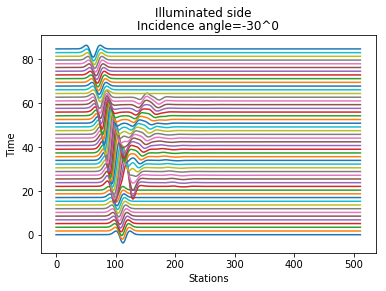

In [66]:
plt.suptitle('Illuminated side')
#plt.subplot(324)
for i in range(NES):
    plt.plot(15*crackTimeILL[i,3,:].real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=-30^0')
plt.show()


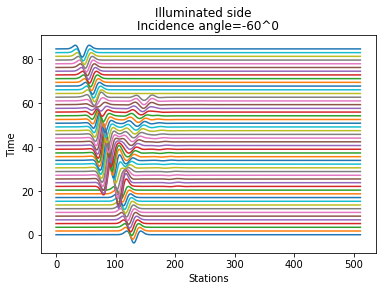

In [67]:
plt.suptitle('Illuminated side')
#plt.subplot(325)
for i in range(NES):
    plt.plot(15*crackTimeILL[i,4,:].real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=-60^0')
plt.show()



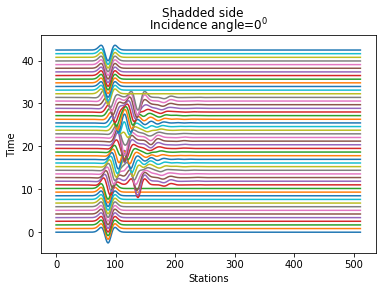

In [68]:
dd2 = np.max(crackTimeSHA) 
plt.figure(3)
plt.suptitle('Shadded side')
#plt.subplot(321)
for i in range(NES):
    plt.plot(10*(crackTimeSHA[i,0,:]).real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=$0^\mathrm{0}$')
plt.show()

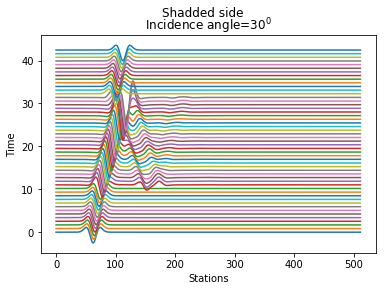

In [69]:
dd2 = np.max(crackTimeSHA) 
plt.figure(3)
plt.suptitle('Shadded side')
#plt.subplot(321)
for i in range(NES):
    plt.plot(10*(crackTimeSHA[i,1,:]).real+ 2*i*dd2.real)
plt.xlabel('Stations')
plt.ylabel('Time')
plt.title('Incidence angle=$30^\mathrm{0}$')
plt.show()

Cite:
Sánchez-Sesma, F. J. and U. Iturrarán-Viveros. Scattering and diffraction of SH waves by a finite crack: an analytical solution. Geophys. J. Int.145(3), 749-758, 2001.